# Exercise: Diabetes

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

## Importing the dataset

In [ ]:
import pandas as pd
df = pd.read_csv('/content/sample_data/diabetes2.csv')

In [ ]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Preprocessing

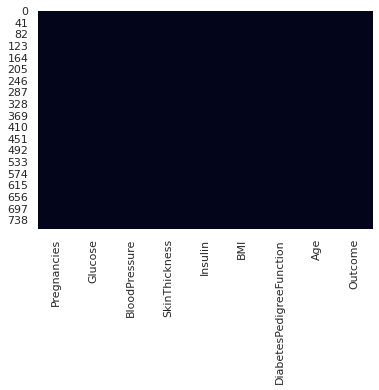

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

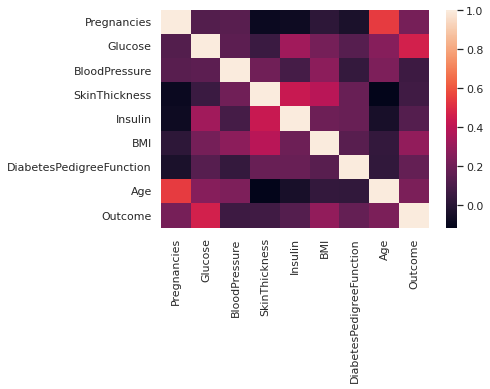

In [ ]:
sns.heatmap(df.corr())

In [ ]:
y = df['Outcome']

X = df.drop('Outcome', axis = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Training models of your choice

Try multiple models and adjust some values. Which one perform the best?

In [ ]:
classifiers = {}

In [ ]:
from sklearn.linear_model import LogisticRegression

classifiers['lr'] = LogisticRegression()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

classifiers['dt'] = DecisionTreeClassifier()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifiers['rf'] = RandomForestClassifier()

In [ ]:
import xgboost as xgb

classifiers['xg'] = xgb.XGBClassifier()

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
def prec_recall_ROC_plot(clf,X_test):
  '''
  clf คือ โมเดลที่ใช้
  ฟังก์ชันนี้จะแสดงค่าพล็อตกราฟของ precision และ recall ที่ threshold ต่าง ๆ และ ROC
  '''
  # ทำนายค่าของ test data
  y_score = clf.predict_proba(X_test)

  # คำนวณค่า average precision
  print('avg. precision: %.2f' % average_precision_score(y_test, y_score[:, 1]))
  
  # คำนวณค่า precision, recall (true positive rate, TPR) และ false positive rate (FPR) ที่ threshold ต่าง ๆ
  precision, recall, threshold = precision_recall_curve(y_test, y_score[:, 1])
  fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
  roc_auc = auc(fpr, tpr)

  # พล็อตกราฟ
  plt.figure(figsize=(18, 4))

  # precision and recall
  plt.subplot(131)
  plt.plot(threshold, precision[:-1], color='darkorange', lw=2, label='precision')
  plt.plot(threshold, recall[:-1], color='navy', lw=2, label='recall')
  plt.xlim([-0.05, 1.05])
  plt.ylim([-0.05, 1.05])
  plt.xlabel('Threshold')
  plt.title('Precision and recall vs threshold')
  plt.legend(loc='lower left')
    
  # ROC
  plt.subplot(132)
  plt.plot(fpr, tpr, color='black', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
  plt.xlim([-0.05, 1.05])
  plt.ylim([-0.05, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic (ROC)')
  plt.legend(loc='lower right')
  plt.show()

Logistic regression
accuray score: 0.78
avg. precision: 0.70


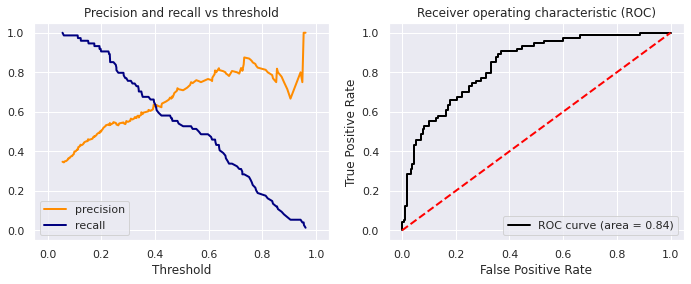





Decision tree
accuray score: 0.73
avg. precision: 0.48


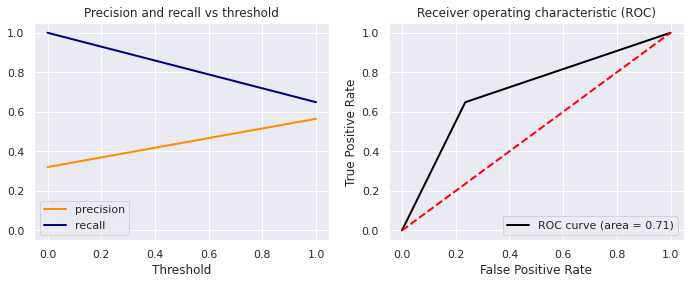





Random forest
accuray score: 0.78
avg. precision: 0.70


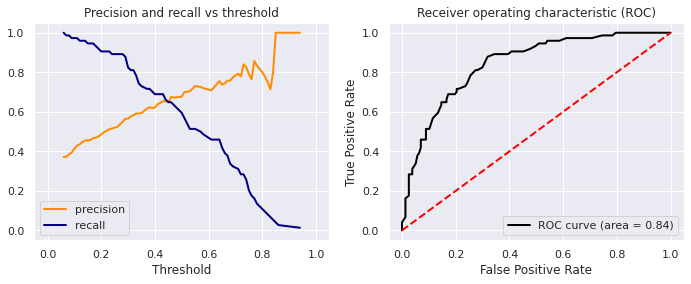





XGBoost
accuray score: 0.77
avg. precision: 0.68


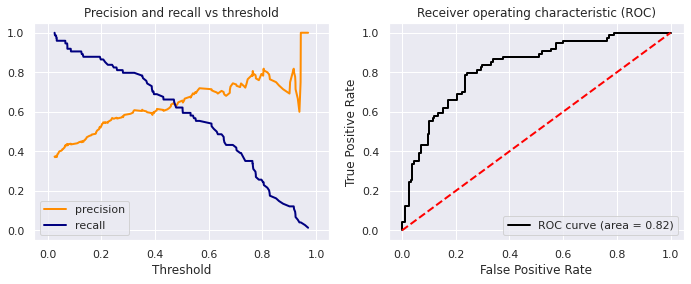

In [ ]:
from sklearn.metrics import accuracy_score,average_precision_score
# สร้าง dictionary สำหรับอธิบายตัวย่อของแต่ละโมเดล
model_description = {'lr': 'Logistic regression', 'dt': 'Decision tree', 'rf': 'Random forest', 'xg': 'XGBoost'}

# สร้าง loop สำหรับการเทรนและทดสอบโมเดล
for model_name in model_description.keys():
    model = classifiers[model_name]
    #Train the model
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(model_description[model_name])
    print("accuray score: %.2f"%accuracy_score(y_test,y_pred))
    prec_recall_ROC_plot(model,X_test)
    print('\n\n\n') #print new lines

In [ ]:
model = RandomForestClassifier()
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Predicting the Test set results

In [ ]:
predictions = model.predict(X_test)

## Plotting the Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print("Accuracy:\t %.3f" %accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy:	 0.771
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       157
           1       0.68      0.54      0.60        74

    accuracy                           0.77       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.76      0.77      0.76       231



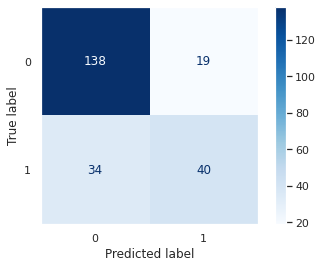

In [ ]:
from sklearn.metrics import plot_confusion_matrix
cm = plot_confusion_matrix(model,X_test, y_test,cmap="Blues",values_format='.3g');
plt.grid(None)
plt.show()

[0.08589122 0.25559547 0.08171353 0.07075403 0.07305019 0.16284323
 0.12638552 0.14376681]


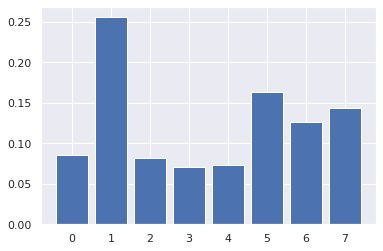

In [ ]:
importances = model.feature_importances_
print(importances)

from matplotlib import pyplot
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()